### 数据预处理  
#### 数据清洗  
+ 删除无关数据、重复数据  
+ 平滑噪声数据  
+ 处理缺失值、异常值 

####  数据集成  

####  数据变换  
+ 简变函数变换（平方、开方、去对数、差分）
+ 规范化
    + 最大、最小规范化
    + 零均值规范化
    + 小数定标规范化
+ 连续属性离散化
    + 等宽
    + 等频
    + 基于聚类分析的方法
+ 属性构造
+ 小波变换

####  数据规约
+ 属性规约
    + 寻找最小的属性的子集并确保新数据子集的概率分布尽可能的接近原来数据集的分布；
    + 主要方法：合并属性、前向选择、后向选择、决策树归纳、主成分分析  

+ 数值规约
    + 寻找替代的、较小的数据集来减少数据量
    + 参数方法：存放模型
    + 非参数方法：存放图形分布等等

#### 数据预处理函数
+ 插值函数(拉格朗日插值、样条插值、高维插值)
+ unique函数
+ isnull/notnull函数
+ PCA
+ random函数

In [74]:
import pandas as pd
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from scipy.io import loadmat #mat是Python的专用数据格式，需要用loadmat函数提取它 
import pywt  #导入Pywavelets

In [35]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

%matplotlib inline

### 数据清洗  
#### 缺失值处理
+ 均值、中位数、众数插补
+ 临近值插补
+ 回归方法
+ 插值法（拉格朗日插值法、牛顿插值法、分段插值法、样条插值法）
    + 拉格朗日插值法  
        + 用n次多项式将平面上n个点连接  
        + 缺点：当节点增减时，插值多项式会随之变化，计算不方便  
    + 牛顿插值法
        + 针对所有可能的情况构建阶差商公式，增减节点很方便

In [2]:
inputfile = './data/missing_value.csv'
outputfile = './data/repair_missing_value.csv'

In [3]:
data = pd.read_csv(inputfile, encoding='gb18030')

In [4]:
data.head()

,时间,销量
0,2007,232.0
1,2008,2699.0
2,2009,NaN
3,2010,3442.0
4,2011,3393.0


In [5]:
data.loc[(data["销量"] < 400) | (data["销量"] > 6000), "销量"]= None

In [6]:
# 自定义向量插值函数
    # s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s,n,k = 5):
    y = s[list(range(n-k,n))+list(range(n+1+k))]   # 把被插值位置的前后各5个元素取出
    y = y[y.notnull()]   # 去掉缺失值
    return lagrange(y.index,list(y))[n]   # 计算拉格朗日值，作为插值位置的拉个朗日值

    # 逐个元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data.loc[j,i] = ployinterp_column(data[i],j)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:1185: RuntimeWarning: divide by zero encountered in true_divide
  return poly1d(self.coeffs/other)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:1185: RuntimeWarning: invalid value encountered in true_divide
  return poly1d(self.coeffs/other)


In [7]:
data.to_csv(outputfile)

#### 异常值处理
+ 删除
+ 视为缺失值
+ 平均值修正
+ 不处理

### 数据集成  
+ 将不同数据源的数据集成：注意冗余，单位不统一等问题

### 数据变换 
+ 简变函数变换（平方、开方、去对数、差分）
+ 规范化
    + 最大、最小规范化
    + 零均值规范化
    + 小数定标规范化

In [8]:
inputfile = './data/normalize.xls'
outputfile = './data/repair_normalize.xls'

In [9]:
data = pd.read_excel(inputfile,encoding = 'gb18030')

In [10]:
data

,a,b,c
1,78,63,48
2,56,98,140
3,34,48,63
4,12,140,98
5,48,2,78
6,140,0,56
7,63,7,34
89,98,99,12


In [11]:
# 最大、最小规范化
(data - data.min())/(data.max()-data.min())

,a,b,c
1,0.515625,0.450000,0.281250
2,0.343750,0.700000,1.000000
3,0.171875,0.342857,0.398438
4,0.000000,1.000000,0.671875
5,0.281250,0.014286,0.515625
6,1.000000,0.000000,0.343750
7,0.398438,0.050000,0.171875
89,0.671875,0.707143,0.000000


In [12]:
# 零均值规范化
(data - data.mean())/data.std()

,a,b,c
1,0.299332,0.112105,-0.456875
2,-0.255220,0.779965,1.862161
3,-0.809772,-0.174121,-0.078772
4,-1.364325,1.581397,0.803471
5,-0.456875,-1.051879,0.299332
6,1.862161,-1.090043,-0.255220
7,-0.078772,-0.956471,-0.809772
89,0.803471,0.799047,-1.364325


In [13]:
# 小数定标规范化
data/10**np.ceil(np.log10(data.abs().max()))

,a,b,c
1,0.078,0.063,0.048
2,0.056,0.098,0.140
3,0.034,0.048,0.063
4,0.012,0.140,0.098
5,0.048,0.002,0.078
6,0.140,0.000,0.056
7,0.063,0.007,0.034
89,0.098,0.099,0.012


+ 连续属性离散化
    + 等宽
    + 等频
    + 基于聚类分析的方法

In [14]:
inputfile = './data/discretization_data.xls'
outputfile = './data/repair_discretization_data.xls'

In [15]:
data = pd.read_excel(inputfile,encoding = 'gb18030')
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [16]:
data = data.loc[:,"肝气郁结证型系数"].copy()
k = 4

In [38]:
# 等宽离散化:给出每个数值的所属分类
d1 = pd.cut(data,k,labels = range(k))
d1.head()

0    0
1    3
2    0
3    2
4    1
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [18]:
# 等频离散化
w = [1.0*i/k for i in range(k+1)]
w[0] = w[0]*(1-1e-10)

w = data.describe(percentiles = w)[4:4+k+1]
d2 = pd.cut(data,w,labels = range(k))

In [19]:
# 基于聚类分析的方法
from sklearn.cluster import  KMeans

In [43]:
kmodel = KMeans(n_clusters = k,n_jobs = -1)  # 建模
kmodel.fit(data.values.reshape(len(data),1)) #训练

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
c = pd.DataFrame(kmodel.cluster_centers_)  #输出类中心
c_sort = c.sort_values(by = 0) # 将类中心排序
w = c_sort.rolling(window=2,center=False).mean().iloc[1:] # 计算相邻2项的中点，作为边界线
w = [0]+ list(w[0])+[data.max()]  # 补首末边界点上 
d3 = pd.cut(data,w,labels = range(k))  

In [58]:
d3 = pd.cut(data,w,labels = range(k)) 

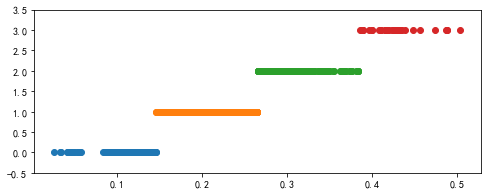

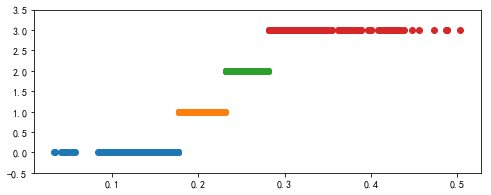

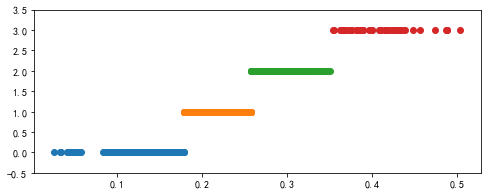

In [61]:
# 作图展示聚类效果
k = 4
def cluster_plot(d,k):
    plt.figure(figsize = (8,3))
    for j in range(0,k):
        plt.plot(data[d ==j],[j for i in d[d==j]],'o')
        
    plt.ylim(-0.5,k-0.5)
    return plt
cluster_plot(d1,k).show()
cluster_plot(d2,k).show()
cluster_plot(d3,k).show()

+ 属性构造
+ 小波变换   
一种信号分析手段，通过平移和伸缩等运算过程对信号进行多尺度聚焦分析，提供一种非平稳信号的时频分析手段；  
把非平稳信号分解为表达不同层次、不同频带信息的数据序列，即小波系数，取不同的小波系数，即完成信号的特征提取；

In [62]:
inputfile = './data/xiaobo.mat'
outputfile = './data/repair_xiaobo.mat'

In [71]:
mat = loadmat(inputfile)
mat

{'leleccum': array([[ 420.20278994,  423.52653517,  423.52271225, ...,  323.96580997,
          323.2400761 ,  323.85476049]])}

In [72]:
signal = mat['leleccum'][0]
signal

In [75]:
coeffs = pywt.wavedec(signal,'bior3.7',level = 5)

In [77]:
coeffs  # 第一个数组为逼近系数数组，后面的依次是细节系数数组

[array([ 2415.1478541 ,  2395.74470824,  2402.22022728,  2408.90987352,
         2402.22022728,  2395.74470824,  2415.1478541 ,  2369.53622493,
         1958.0913368 ,  1983.87619596,  1901.68851538,  1651.86483216,
         1482.45129628,  1356.98779058,  1257.4459793 ,  1265.75505172,
         1363.66712581,  1427.53767222,  1568.87951307,  1893.80694993,
         2295.89161125,  2555.9239482 ,  2778.31817145,  2871.0940301 ,
         2954.38189098,  2981.0281365 ,  2986.06286012,  3091.56214184,
         3085.0678644 ,  2840.05639099,  2782.74679521,  2776.99922688,
         2833.0658032 ,  2907.76710805,  2496.58749928,  2443.95791914,
         2338.50723857,  2394.15834442,  2186.86013504,  2142.10730351,
         2066.37469747,  2097.47366057,  2190.20987484,  2024.82470966,
         1999.88792082,  1761.22260043,  2012.8983115 ,  1733.14320566,
         1955.69105593,  2296.53399998,  2332.11621828,  2436.91433782,
         2248.43497823,  1928.01215666,  1900.73383661,  1804.08

### 数据规约
#### 属性规约
+ 寻找最小的属性的子集并确保新数据子集的概率分布尽可能的接近原来数据集的分布；
+ 主要方法：合并属性、前向选择、后向选择、决策树归纳、主成分分析  

#### 数值规约
+ 寻找替代的、较小的数据集来减少数据量
+ 参数方法：存放模型
+ 非参数方法：存放图形分布等等

In [93]:
#主成分分析
inputfile = './data/principal_component.xls'
outputfile = './data/repair_principal_component.xls'

data = pd.read_excel(inputfile,header = None,encoding = 'gb18030')

from sklearn.decomposition import PCA
pca = PCA(copy = True,whiten = False)  # n_components= 2指定主成分的个数；copy确定是否将原始数据复制一份；whiten确定在训练过程中是否标准化
pca.fit(data)
pca.components_; # 返回模型的各个特征向量
pca.explained_variance_ratio_  # 返回各个主成分各自的方差比

array([  7.74011263e-01,   1.56949443e-01,   4.27594216e-02,
         2.40659228e-02,   1.50278048e-03,   4.10990447e-04,
         2.07718405e-04,   9.24594471e-05])

In [95]:
# 发现前4个主成分可以解释97.73%，效果已经很好了，故选取前4个主成分重建模
pca = PCA(4)
pca.fit(data)
low_d = pca.transform(data) #用该主成分降维过程来对数据来进行降维 
pd.DataFrame(low_d).to_excel(outputfile) #保存降维以后的数据
pca.inverse_transform(low_d) # 用inverse_transform可以将降维以后的数据进行复原

array([[ 40.36776862,  24.67875828,   7.37281209,   6.27766692,
          7.7514954 ,   8.8956645 ,   2.72879805,  20.06617929],
       [ 25.05744013,  12.83380941,  11.0556947 ,  10.43798835,
         13.89166722,  19.92206437,   2.11529446,   8.97072768],
       [ 13.19641158,   3.30100766,   4.16723199,   3.90324602,
          4.10704509,   5.75594269,   0.45601844,   3.6427863 ],
       [ 22.20481256,   6.69010056,   5.62250933,   5.02225958,
          5.42536837,   7.16265215,   0.85460602,   7.35378573],
       [ 34.3434617 ,  11.84313794,   7.01186623,   6.6221532 ,
          8.61286448,   8.7702713 ,   1.1392978 ,  27.42822595],
       [ 35.68765783,  12.52439404,  16.21062253,  15.86040898,
         22.45518392,  30.00701172,   2.2444096 ,  26.62984206],
       [ 22.03225432,   7.71013854,   9.96427322,   9.58982684,
         12.69879277,  17.74554792,   1.4035654 ,  10.61250906],
       [ 48.39184057,  13.39313401,  11.14045831,   9.57795791,
         10.9902031 ,  13.8766282

### 数据预处理函数
+ 插值函数(拉格朗日插值、样条插值、高维插值)
+ unique函数
+ isnull/notnull函数
+ PCA
+ random函数

In [96]:
# 1、插值函数
from scipy.interpolate import *  #导入插值函数

f = scipy.interpolate.lagrange(x,y) # 插值命令

f(a) # 计算插值结果

In [ ]:
# unique函数
np.unique(D)
D.unique()

In [ ]:
# isnull/notnull函数
D.isnull
D.notnull

In [97]:
# random函数
np.random.rand(k,m,n) # 生成k * m * n的随机*（0,1）均匀分布矩阵
np.random.randn(k,m,n) # 生成k * m * n的随机正态矩阵

NameError: name 'm' is not defined